<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Importe las bibliotecas requeridas que necesitamos para el laboratorio.


In [6]:
import piplite
import numpy as np
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Lea el conjunto de datos en el archivo csv desde la URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Agregue su código a continuación siguiendo las instrucciones proporcionadas en el curso para completar la tarea calificada por pares.


## A continuación, se describen las variables del conjunto de datos:

| Variable    | Descripcion                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| CRIM    | tasa de criminalidad per cápita por ciudad.                                                                                       |
| ZN         | proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.                                                                                                                                  |
| INDUS      | proporción de acres comerciales no minoristas por ciudad.                                                                                                |
| CHAS     | variable ficticia del Río Charles (1 si el tramo limita con el río; 0 en caso contrario).                                                                                                               |
| NOX      | concentración de óxidos nítricos (partes por 10 millones).  |
| RM        | número medio de habitaciones por vivienda.                                                    |
| AGE    | proporción de unidades ocupadas por el propietario construidas antes de 1940.                                                                                                     |
| DIS      | distancias ponderadas a cinco centros de empleo de Boston                                                                                                          |
| RAD      | índice de accesibilidad a carreteras radiales.                                                                                                                  |
| TAX    | tasa de impuesto a la propiedad de valor total por $10,000.                                                                                              |
| PTRATIO | proporción alumno-profesor por municipio.                                                                                                            |
| LSTAT        | % menor estado de la población.                                                                                                                 |
| MEDV      |valor medio de las viviendas ocupas por propietarios en 1000

#### 1). Para el "Valor medio de las casas ocupadas por el propietario", proporcione un diagrama de caja. 


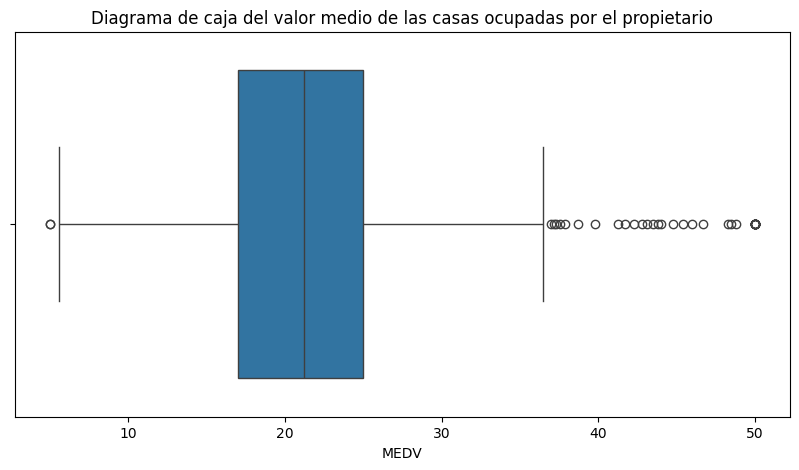

In [12]:
pyplot.figure(figsize=(10,5))
ax = sns.boxplot(x="MEDV", data=boston_df)
pyplot.title("Diagrama de caja del valor medio de las casas ocupadas por el propietario")
pyplot.show()

#### 2). Proporcionar un histograma para la variable del río Charles. 

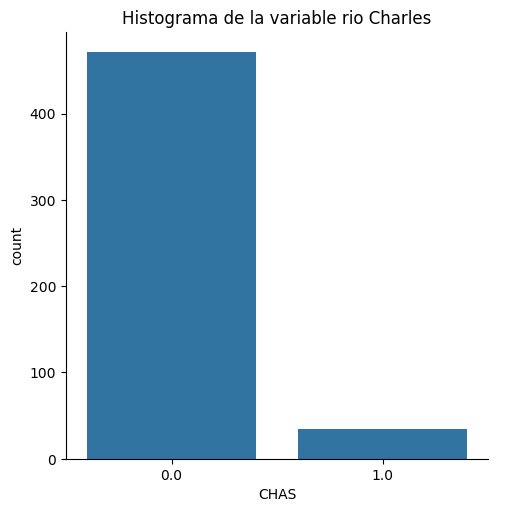

In [46]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title("Histograma de la variable rio Charles")
pyplot.show()

In [64]:
boston_df.loc[(boston_df["AGE"] <= 35),'Edad'] = '35  años o menos'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'Edad'] = 'entre 35 y 70 años'
boston_df.loc[(boston_df["AGE"] >= 70),'Edad'] = 'Mas de 70 años'

In [65]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,Edad
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,entre 35 y 70 años,entre 35 y 70 años
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Mas de 70 años,Mas de 70 años
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,entre 35 y 70 años,entre 35 y 70 años
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,entre 35 y 70 años,entre 35 y 70 años
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,entre 35 y 70 años,entre 35 y 70 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,entre 35 y 70 años,entre 35 y 70 años
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,Mas de 70 años,Mas de 70 años
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,Mas de 70 años,Mas de 70 años
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,Mas de 70 años,Mas de 70 años


#### 3).  Proporcione un diagrama de caja para la variable MEDV frente a la variable
AGE. (Discretizar la variable de edad (age) en tres grupos de 35 años o menos,
entre 35 y 70 años y 70 años y más).  

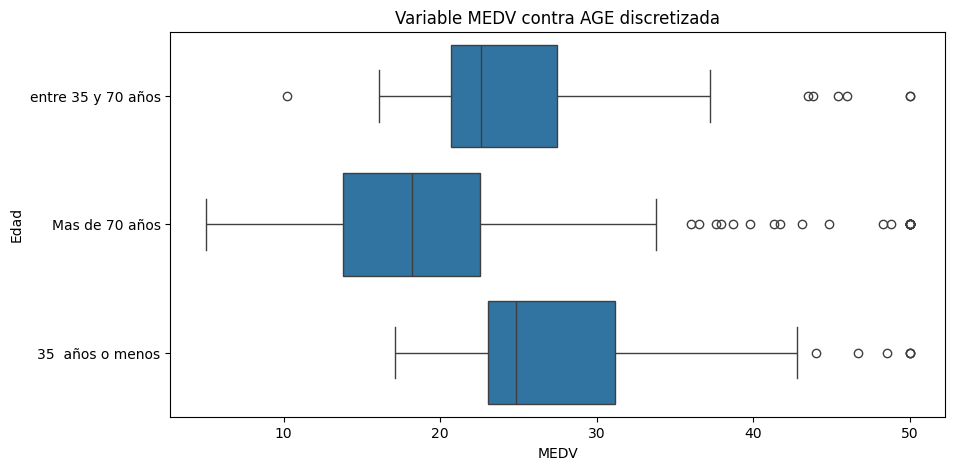

In [67]:
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.Edad, data=boston_df)
pyplot.title("Variable MEDV contra AGE discretizada")
pyplot.show()

#### 4).  Proporcionar un diagrama de dispersión para mostrar la relación entre las 
concentraciones de óxido nítrico y la proporción de acres comerciales n 
minoristas por ciudad. ¿Qué puedes decir sobre la relación? 

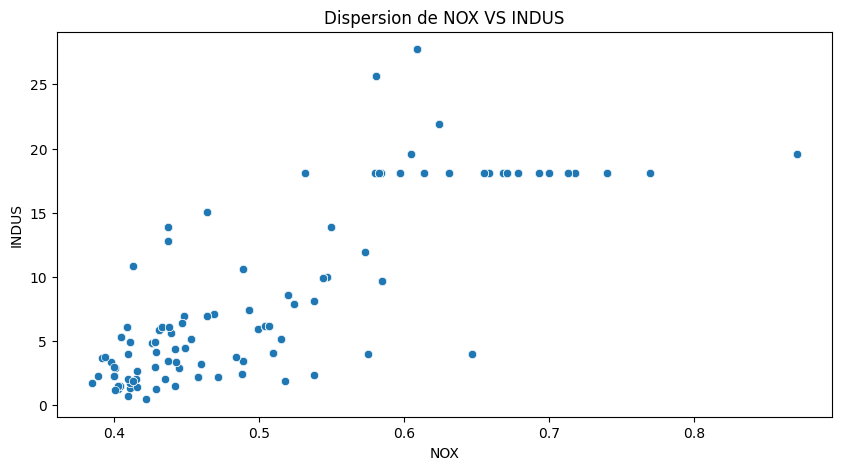

In [68]:
pyplot.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
pyplot.title("Dispersion de NOX VS INDUS")
pyplot.show()

#### 5). Crear un histograma para la variable de proporción de alumnos por maestro.


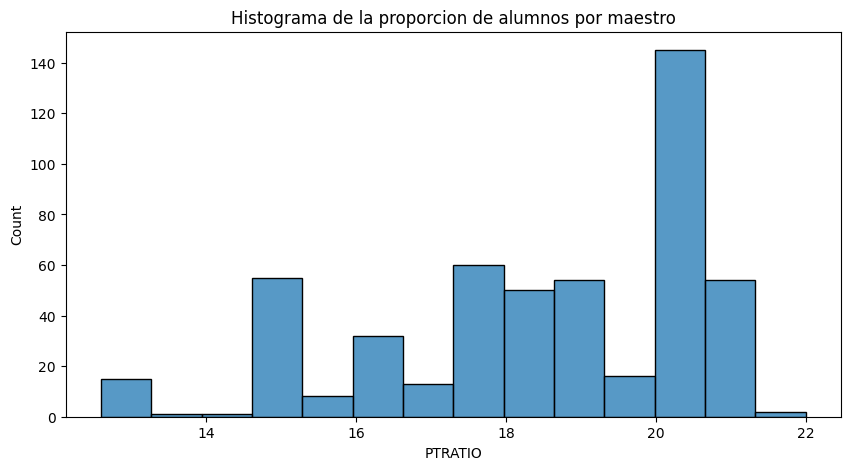

In [78]:
pyplot.figure(figsize=(10,5))
sns.histplot(boston_df["PTRATIO"], kde=False)
pyplot.title("Histograma de la proporcion de alumnos por maestro")
pyplot.show()

In [80]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,Edad
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,entre 35 y 70 años,entre 35 y 70 años
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Mas de 70 años,Mas de 70 años
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,entre 35 y 70 años,entre 35 y 70 años
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,entre 35 y 70 años,entre 35 y 70 años
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,entre 35 y 70 años,entre 35 y 70 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,entre 35 y 70 años,entre 35 y 70 años
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,Mas de 70 años,Mas de 70 años
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,Mas de 70 años,Mas de 70 años
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,Mas de 70 años,Mas de 70 años


#### 6). Para cada una de las siguientes preguntas; ¿Existe una diferencia significativa
#### en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T
#### para muestras independientes).).
 

In [81]:
boston_df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [82]:
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
a

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [83]:
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]
b

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [84]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [85]:
boston_df["AGE"].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

In [86]:
boston_df.loc[(boston_df["AGE"] <= 35),'Edad'] = '35  años o menos'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'Edad'] = 'entre 35 y 70 años'
boston_df.loc[(boston_df["AGE"] >= 70),'Edad'] = 'Mas de 70 años'

In [87]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,Edad
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,entre 35 y 70 años,entre 35 y 70 años
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Mas de 70 años,Mas de 70 años
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,entre 35 y 70 años,entre 35 y 70 años
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,entre 35 y 70 años,entre 35 y 70 años
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,entre 35 y 70 años,entre 35 y 70 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,entre 35 y 70 años,entre 35 y 70 años
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,Mas de 70 años,Mas de 70 años
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,Mas de 70 años,Mas de 70 años
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,Mas de 70 años,Mas de 70 años


#### 7.- ¿Existe una diferencia en los valores medianos de las casas (MEDV) para cada
#### proporción de unidades ocupadas por el propietario construidas antes de 1940
#### (AGE)? (ANOVA).).
 

In [88]:
low = boston_df[boston_df["Edad"] == '35  años o menos']["MEDV"]
mid = boston_df[boston_df["Edad"] == 'entre 35 y 70 años']["MEDV"]
high = boston_df[boston_df["Edad"] == 'Mas de 70 años']["MEDV"]

In [89]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)

In [90]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


#### 8). ¿Podemos concluir que no existe una relación entre las concentraciones de
#### óxido nítrico y la proporción de acres comerciales no minoristas por ciudad?#### (Correlación de Pearson)..
 

In [93]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

In [94]:
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209192, P-value=7.913361061210442e-98


#### Hipótesis nula (H0): No hay relación entre las variables NOX e INDUS.
#### Hipótesis alternativa (H1): Existe relación entre las variables NOX e INDUS
#### Conclusión: Dado que el valor p (Sig. (2 colas) <0,05, rechazamos la hipótesis nula y concluimos que existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

In [95]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'age_group', 'Edad'],
      dtype='object')

#### 9).  ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de
####  empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión).. 

In [96]:
y = boston_df['MEDV']
x = boston_df['DIS']

In [97]:
x = sm.add_constant(x)

In [98]:
results = sm.OLS(y,x).fit()

In [99]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        04:10:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
np.sqrt(0.062)

0.24899799195977465

In [15]:
# Ecuación de la línea de regresión
def medv_value(DIS):
    const = 18.3901
    coeff_DIS = 1.0916 
    y = const + (coeff_DIS * DIS)
    return y

medv_value(1)

19.4817

#### valor DIV de 1 proporcionará un valor MEDV de 19,4817. A continuación se muestra el gráfico de regresión entre estas dos variables.

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

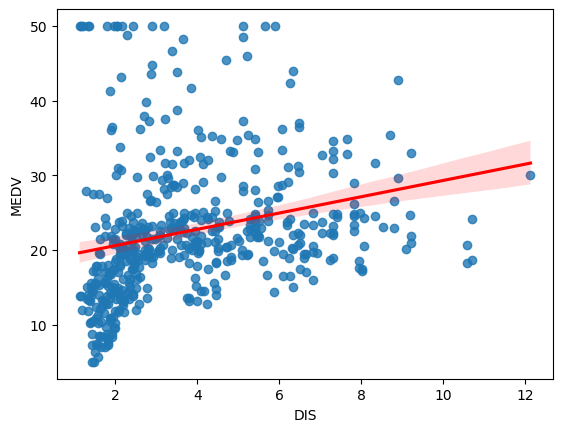

In [14]:
sns.regplot(data=boston_df, x='DIS', y='MEDV', line_kws={'color':'Red'})